In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Pandas is a data manipulation and analysis library. NumPy (Numerical Python) is a library for numerical computing. Seaborn is a data visualization library built on top of Matplotlib. Matplotlib is a data visualization library, and its pyplot module provides an interface for creating static, interactive, and animated visualizations.

In [6]:
# Load training and testing datasets
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

# Display basic information about datasets
print("Train Data:")
print(train_data.info())
print(train_data.head())

print("\nTest Data:")
print(test_data.info())
print(test_data.head())

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  ve

This code reads the Excel files train_data.xlsx and test_data.xlsx into two Pandas DataFrames:
train_data: Stores the training dataset.
test_data: Stores the testing dataset.

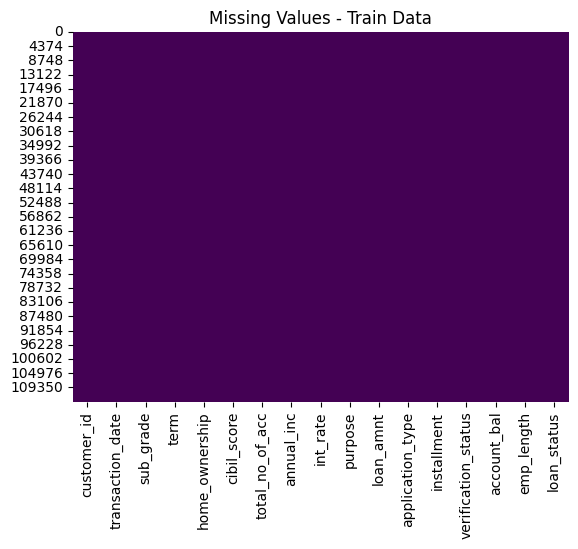

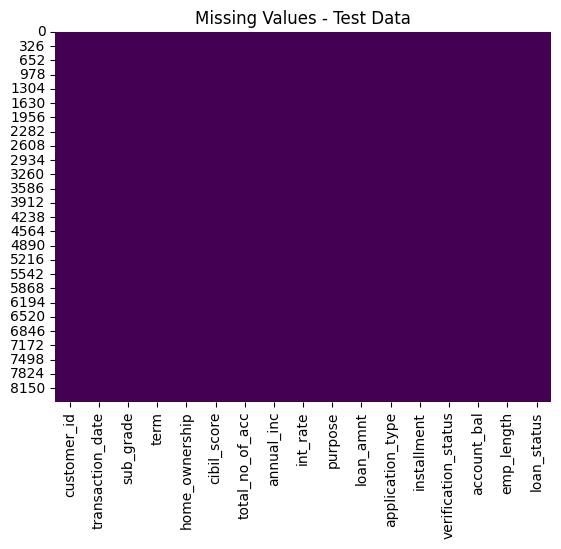

In [7]:
# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values - Train Data")
plt.show()

sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values - Test Data")
plt.show()

Checks for missing values in DataFrame and visualizes the boolean output of train_data.isnull() as a heatmap.

In [8]:
print("Train Data Summary:\n", train_data.describe())
print("\nTest Data Summary:\n", test_data.describe())

Train Data Summary:
         customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%    

This descriptive statistics for numerical features in both the train_data and test_data datasets using describe() function from Pandas. Allows comparison between the train and test datasets.

Target Variable Distribution (%):
 loan_status
1    73.889451
0    26.110549
Name: proportion, dtype: float64


<ipython-input-9-aee2f9c52fe6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='loan_status', palette='Set2')


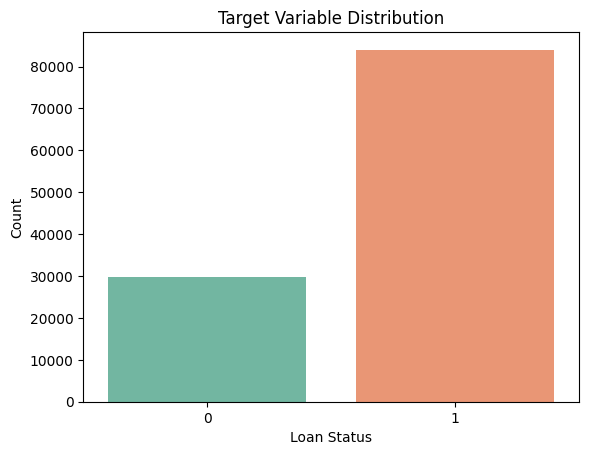

In [9]:
# Analyze target variable distribution
target_distribution = train_data['loan_status'].value_counts(normalize=True) * 100
print("Target Variable Distribution (%):\n", target_distribution)

# Plot distribution
sns.countplot(data=train_data, x='loan_status', palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

Analyze the distribution of the target variable (loan_status), which typically represents the outcome of a loan (e.g., approved or denied). Visualize this distribution to understand the class imbalance or how the target is distributed across different categories. Accesses the loan_status column in the train_data DataFrame.

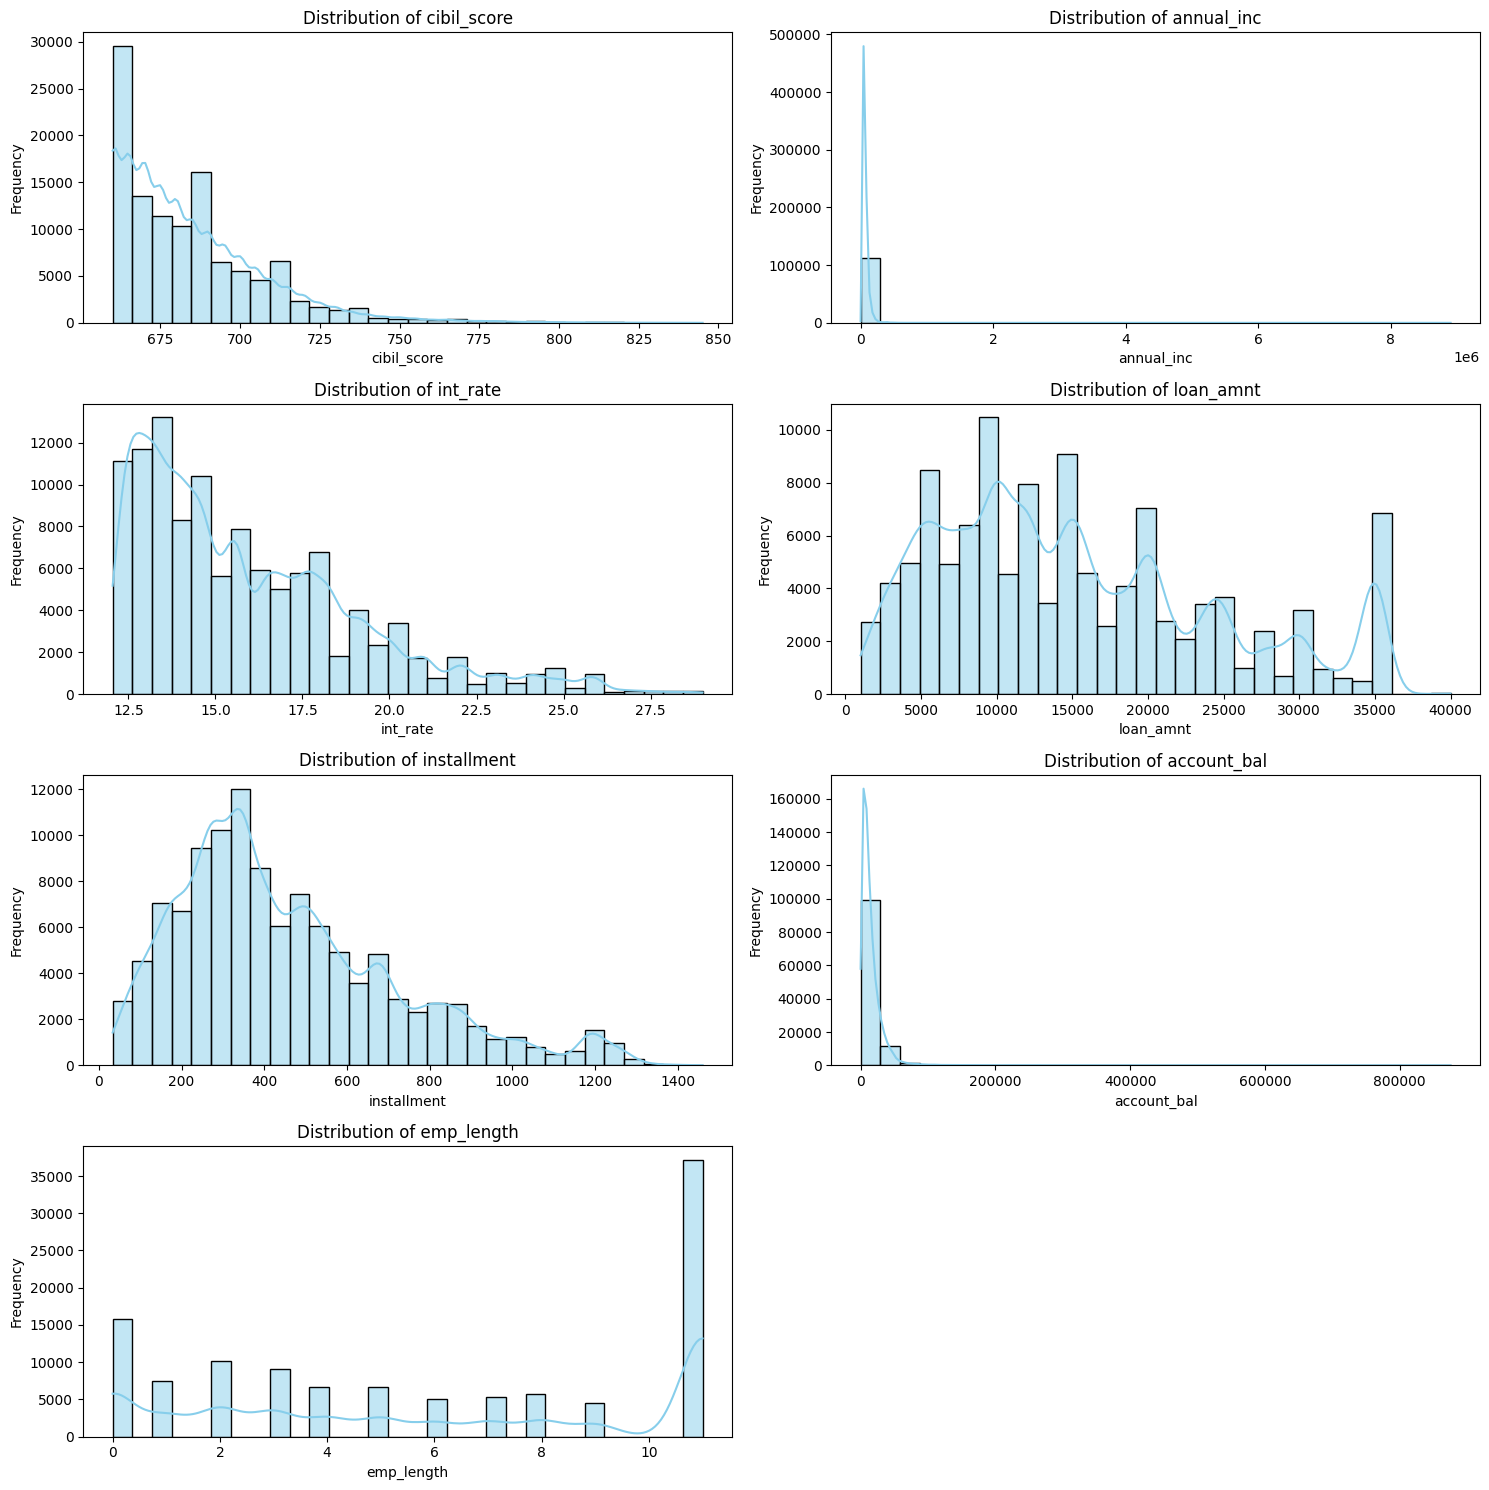

In [10]:
# Plot histograms for numerical features
numerical_features = ['cibil_score', 'annual_inc', 'int_rate', 'loan_amnt',
                      'installment', 'account_bal', 'emp_length']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train_data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Defines a list called numerical_features that contains the names of the numerical columns from the dataset that you want to analyze. Creates a new figure for plotting with a size of 15 by 15 inches. It also adjusts the subplots to ensure that the titles and labels do not overlap.

<ipython-input-15-1941da955d1f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette='Set2',
<ipython-input-15-1941da955d1f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette='Set2',
<ipython-input-15-1941da955d1f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette='Set2',
<ipython-input-15-1941da955d1f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

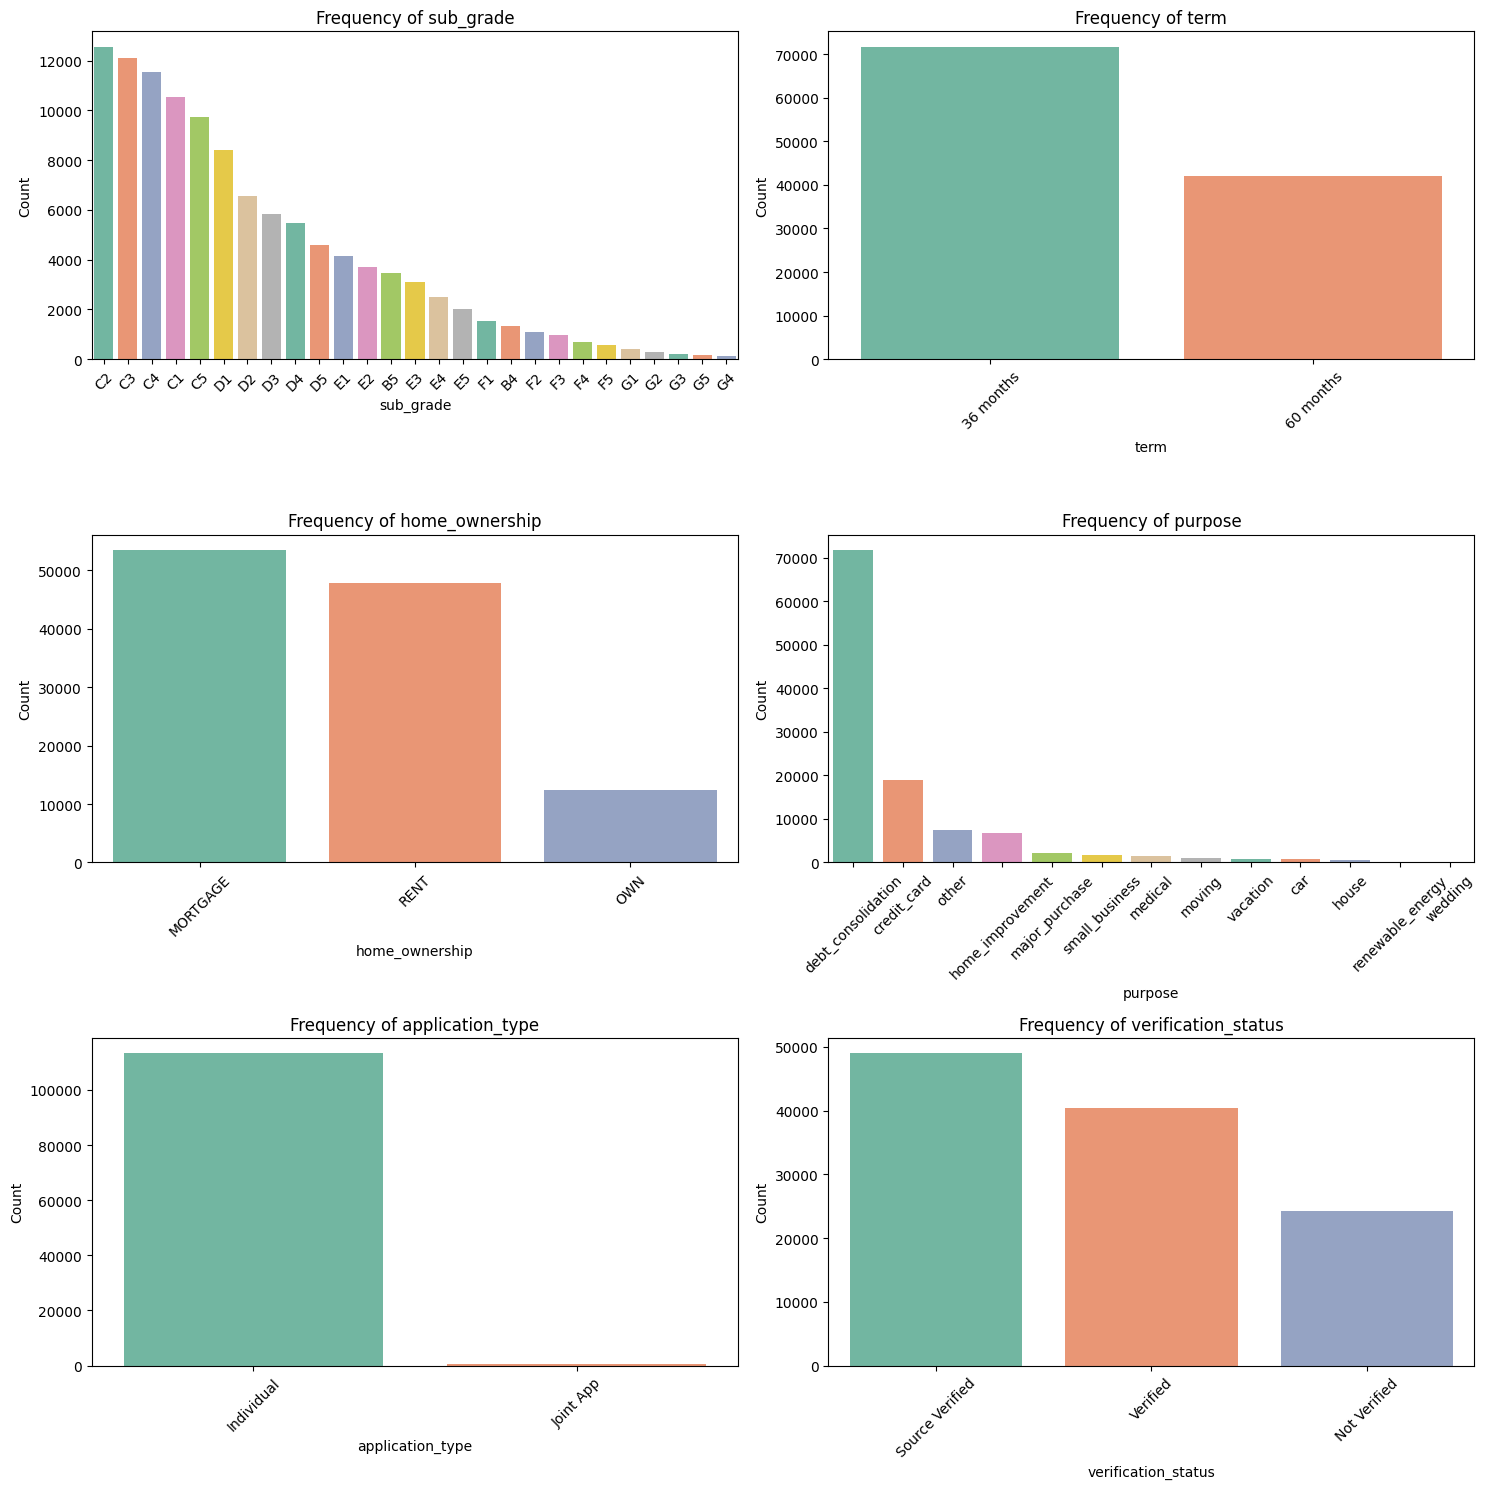

In [15]:
# Plot bar charts for categorical features
categorical_features = ['sub_grade', 'term', 'home_ownership', 'purpose',
                        'application_type', 'verification_status']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=train_data, x=feature, palette='Set2',
                  order=train_data[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Defines a list called categorical_features containing the names of categorical columns from the dataset that you want to analyze. Loops through the categorical_features list, where i is the index (starting from 1) and feature is the column name, adjusts the subplots so that they fit neatly within the figure area. Bar charts allow you to visualize how the categories of a feature are distributed. For example, in home_ownership

Loops through the list numerical_features, where i is the index (starting from 1) and feature is the column name (e.g., cibil_score, annual_inc). Creates a boxplot for the given feature. plt.title(f'Outliers in {feature}'): Sets the title for each boxplot, indicating the feature being analyzed (e.g., "Outliers in cibil_score"). Displays all the boxplots at once.

<ipython-input-12-6de586029544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=feature, palette='Set2')
<ipython-input-12-6de586029544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=feature, palette='Set2')
<ipython-input-12-6de586029544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=feature, palette='Set2')
<ipython-input-12-6de586029544>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue`

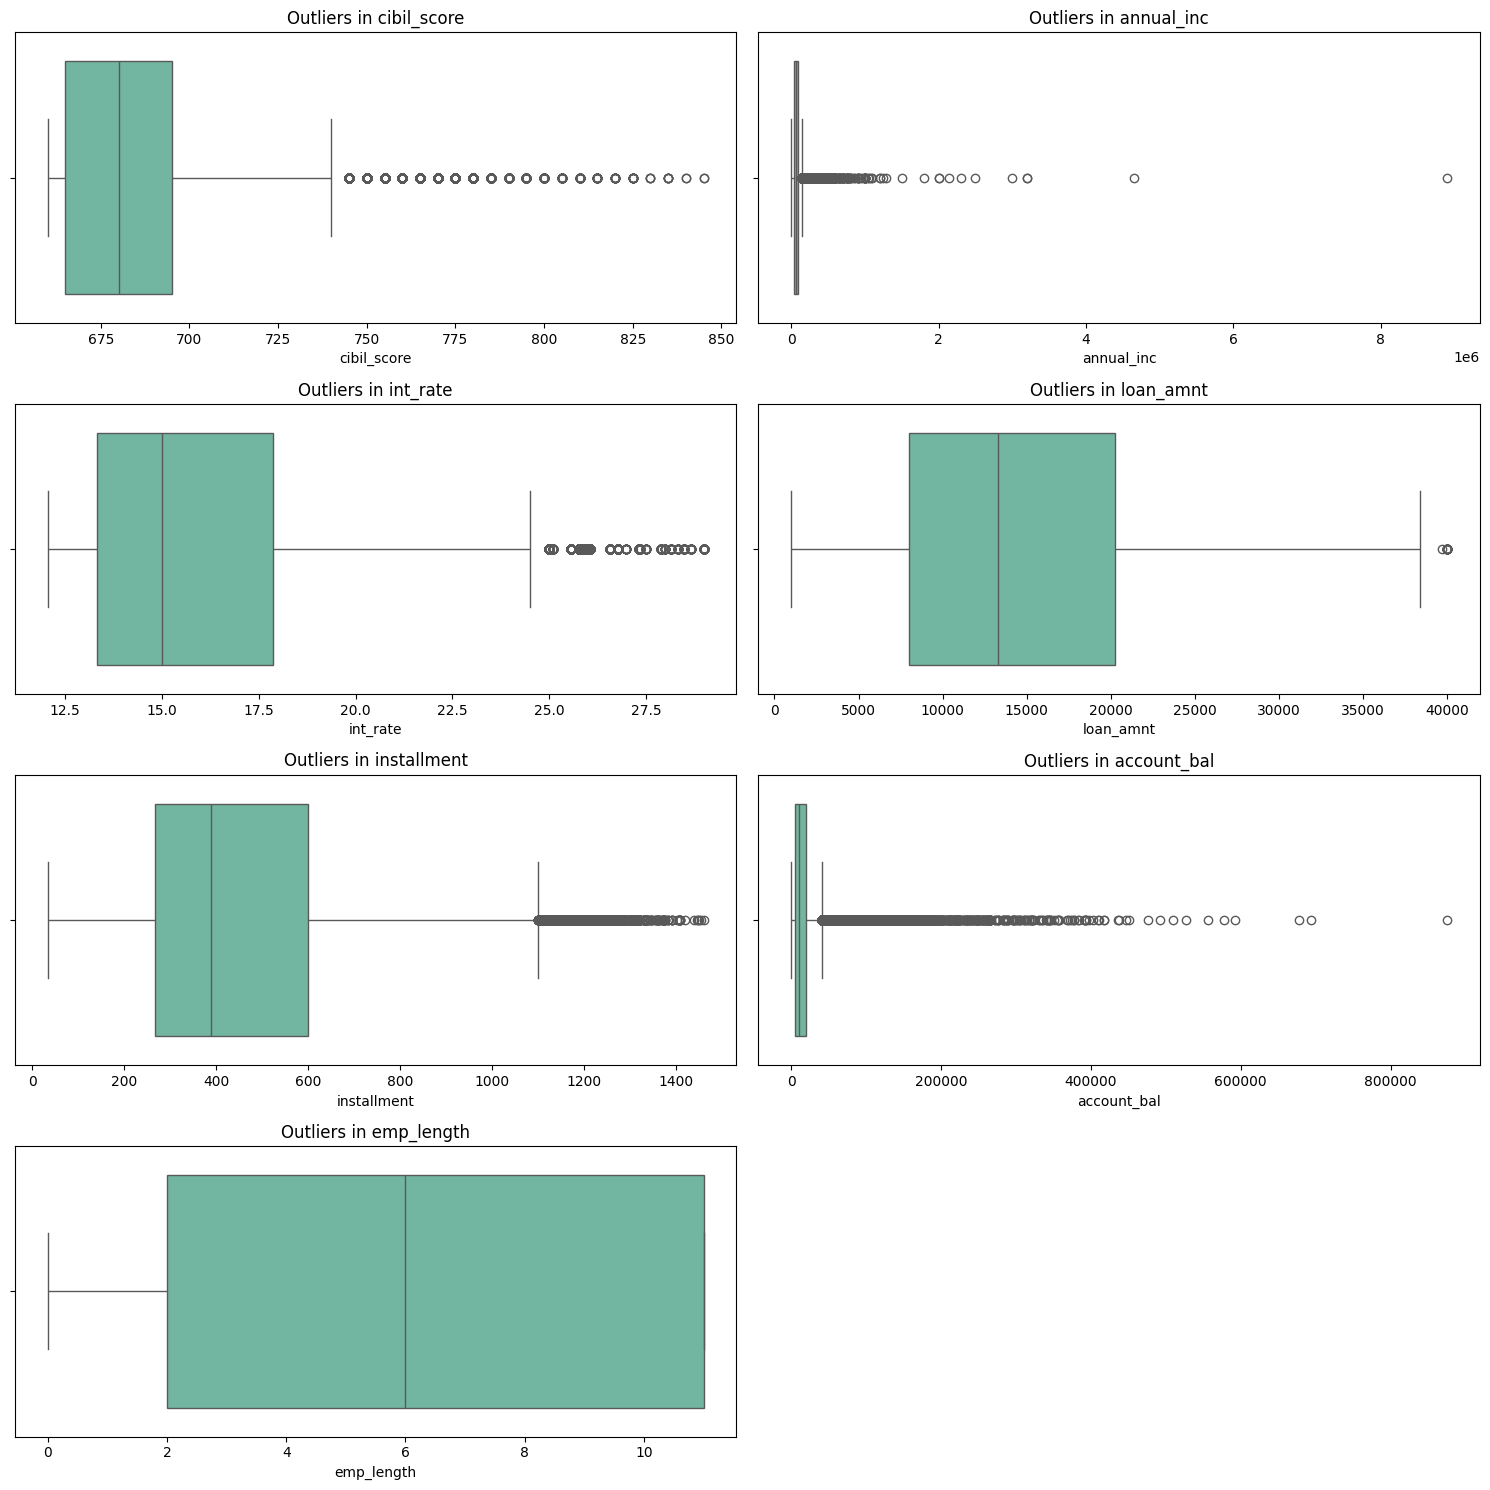

In [12]:
# Boxplots for numerical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=train_data, x=feature, palette='Set2')
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

This boxplot visualizes the distribution of annual_inc (annual income) based on the categories in loan_status. It allows you to visually compare the distributions of numerical features (annual_inc and cibil_score) for the different categories of the loan_status variable.

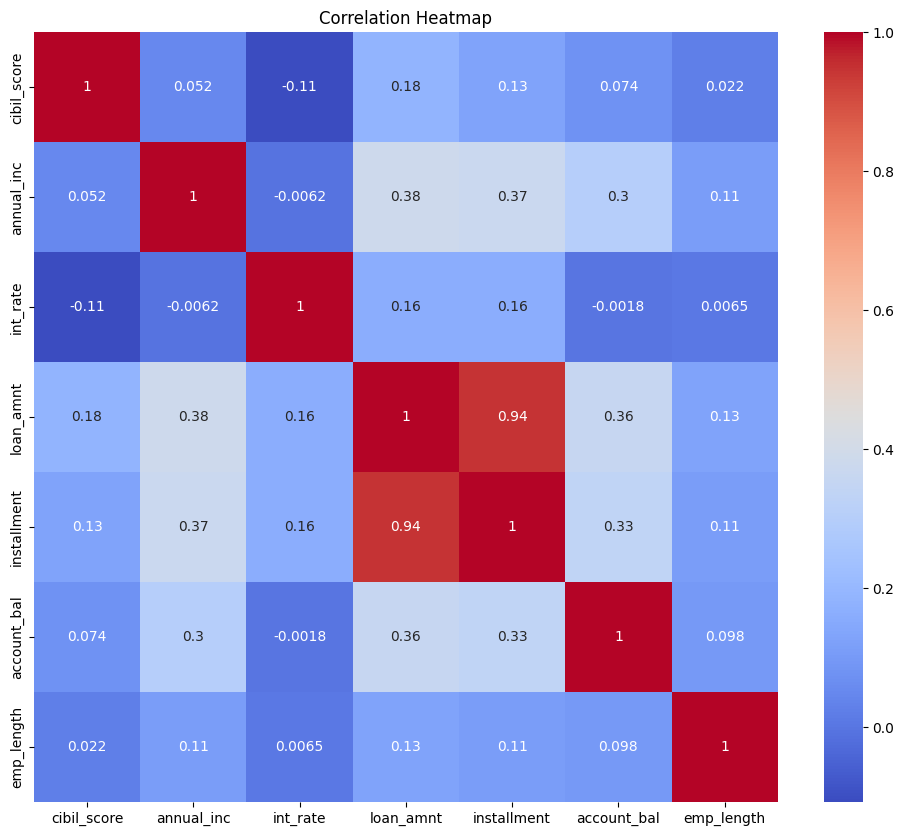

In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = train_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-14-6449826fcb42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='loan_status', y='annual_inc', palette='Set2')


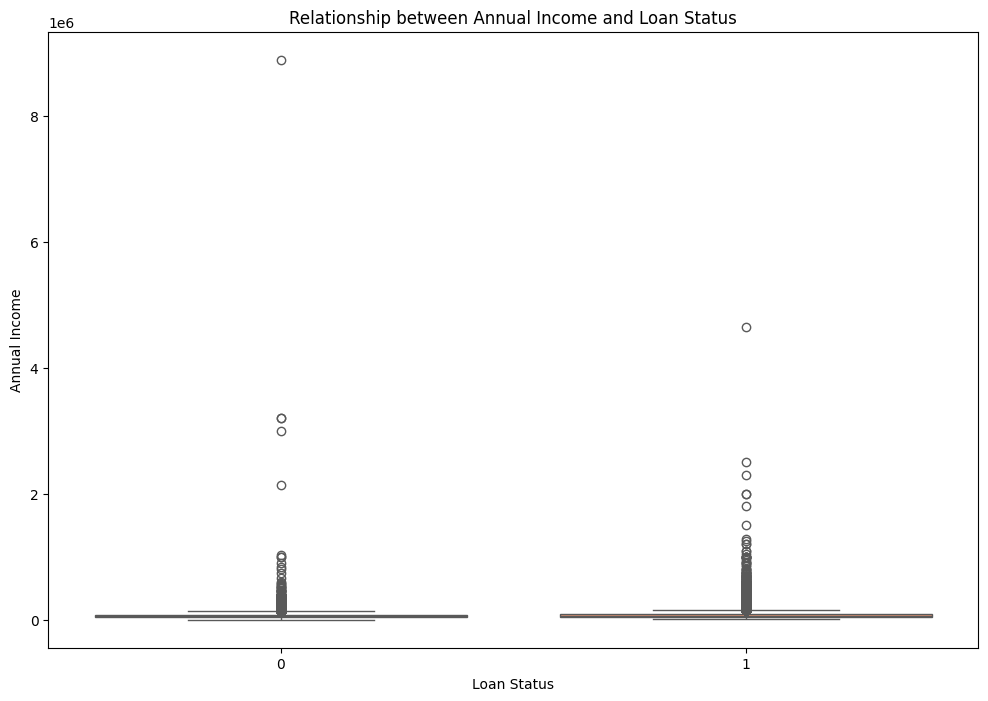

<ipython-input-14-6449826fcb42>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='loan_status', y='cibil_score', palette='Set2')


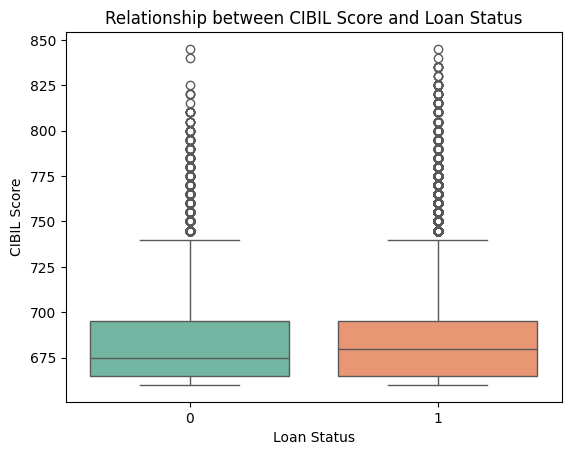

In [14]:
# Analyze relationships between features and target
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data, x='loan_status', y='annual_inc', palette='Set2')
plt.title("Relationship between Annual Income and Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

sns.boxplot(data=train_data, x='loan_status', y='cibil_score', palette='Set2')
plt.title("Relationship between CIBIL Score and Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()